In [ ]:
! lamin load scprint

💡 found cached instance metadata: /home/ml4ig1/.lamin/instance--jkobject--scprint.env
💡 loaded instance: jkobject/scprint


In [9]:
from scdataloader import DataModule

import bionty as bt
import lamindb as ln
import lnschema_bionty as lb

from scdataloader.utils import get_ancestry_mapping, load_genes

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

  %reload_ext autoreload


In [2]:
# TODO: drop tissue & dev stage until part or is taken in account

hierarchical_labels = [
    "cell_type_ontology_term_id", #1
    # "tissue_ontology_term_id",
    "disease_ontology_term_id", # 2
#    "development_stage_ontology_term_id",
    "assay_ontology_term_id", #3
    'self_reported_ethnicity_ontology_term_id', #4
]
labels_to_pred = hierarchical_labels+[
    'sex_ontology_term_id', #5
    "organism_ontology_term_id", #6
]
all_labels = labels_to_pred+[
    #'dataset_id',
    'cell_culture',
    "heat_diff",
    "total_counts",
    "nnz",
    "dpt_group",
]

gene_emb = '../data/temp/embeddings.parquet'
d_model=128

In [ ]:
# we might want not to order the genes by expression (or do it?)
# we might want to not introduce zeros and 

In [ ]:
datamodule.dataset.get_label_weights(datamodule.label_to_weight)

In [ ]:
#before
_.mean(), _.std()

(0.003971863598134931, 0.017726817308807603)

In [ ]:
#after
_.mean(), _.std()

In [20]:
datamodule = DataModule(
    collection_name="preprocessed dataset",
    #gene_embeddings=gene_emb,
    all_labels=all_labels,
    hierarchical_labels=hierarchical_labels,
    organisms=["NCBITaxon:9606"],
    how="most expr",
    max_len=1000,
    add_zero_genes=100,
    label_to_weight=labels_to_pred,
    label_to_pred=labels_to_pred,
    batch_size=8,
    num_workers=1,
    validation_split=0.1,
    test_split=0.1)
testfiles = datamodule.setup()

[autoreload of scdataloader.data failed: Traceback (most recent call last):
  File "/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/ml4ig1/Documents code/scDataLoader/scdataloader/data.py", line 51, in <module>
    class Dataset(torchDataset):
  File "/home/ml4ig1/Documents code/scDataLoader/scdataloader/data.py", line 185, in Dataset
    self, label_key

won't do any check but we recommend to have your dataset coming from local storage
0.0% are aligned
total dataset size is 106.584138411 Gb
---
dataset contains:
     5567614 cells
     70116 genes
     11 labels
     1 organisms
dataset contains 230 classes to predict

downloading gene names from biomart
['ensembl_gene_id', 'hgnc_symbol', 'gene_biotype', 'entrezgene_id', 'start_position', 'chromosome_name']


reduced the size to 0.6722574020195106


## checking unseen genes

## conversion of parental relationships

In [ ]:
df = bt.Tissue.filter().df()

In [ ]:
parentdf = bt.Tissue.filter().df(include=["parents__ontology_id"]).set_index("ontology_id")

In [ ]:
ids

ontology_id
UBERON:8440012    [UBERON:0009663]
Name: parents__ontology_id, dtype: object

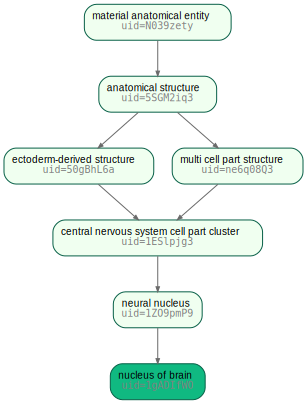

In [ ]:
bt.Tissue.search("nucleus of brain", field="name",return_queryset=True).first().view_parents()

AttributeError: 'Tissue' object has no attribute 'ontology'

In [13]:
import pronto

In [11]:
from pronto import Ontology

In [14]:
def filter_include_id_prefixes(terms: pronto.ontology._OntologyTerms):
    if include_id_prefixes and source in list(include_id_prefixes.keys()):
        return list(
            filter(
                lambda val: any(
                    val.id.startswith(prefix)
                    for prefix in include_id_prefixes[source]  # type: ignore
                ),
                terms,
            )
        )
    else:
        return terms

In [ ]:
if source is not None:
    prefix_list = (
        include_id_prefixes.get(source)
        if include_id_prefixes is not None
        else None
    )
else:
    prefix_list = None

filtered_terms = filter_include_id_prefixes(self.terms())

df_values = []
for term in filtered_terms:
    # skip terms without id or name
    if (not term.id) or (not term.name):
        continue

    # term definition text
    definition = None if term.definition is None else term.definition.title()

    # concatenate synonyms into a string
    synonyms = "|".join(
        [i.description for i in term.synonyms if i.scope == "EXACT"]
    )
    if len(synonyms) == 0:
        synonyms = None  # type:ignore

    # get 1st degree parents as a list
    if prefix_list is not None:
        superclasses = [
            s.id
            for s in term.superclasses(distance=1, with_self=False).to_set()
            if s.id.startswith(tuple(prefix_list))
        ]
    else:
        superclasses = [
            s.id
            for s in term.superclasses(distance=1, with_self=False).to_set()
        ]

    df_values.append((term.id, term.name, definition, synonyms, superclasses))

df = pd.DataFrame(
    df_values,
    columns=["ontology_id", "name", "definition", "synonyms", "parents"],
).set_index("ontology_id")

# needed to avoid erroring in .lookup()
df["name"].fillna("", inplace=True)

TypeError: could not parse ontology from Ontology('/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/bionty_base/_dynamic/ontology_all__uberon__2023-09-05__Tissue', timeout=100)

In [ ]:
i=0
name = "cerebral nuclei"
while i == 0:
    print(name)
    ids = parentdf[parentdf.name==name].parents__ontology_id
    name = [df.loc[d].name for d in ids]

cerebral nuclei


KeyError: "None of [Index(['UBERON:0009663'], dtype='object', name='id')] are in the [index]"

In [ ]:
groupings, _, lclass = get_ancestry_mapping(cats, parentdf)

In [ ]:
['spinal cord', 'vermiform appendix', 'kidney', 'blood', 'caudal ganglionic eminence', 'skin of body', 'mesenteric lymph node', 'hippocampal formation', 'heart', 'uterine cervix', 'coronal suture', 'eye', 'meningeal dura mater', 'descending colon', 'fovea centralis', 'temporal lobe', 'unknown', 'ascending colon', 'jejunum', 'thyroid gland', 'lamina propria', 'mesonephros', 'venous blood', 'jejunal epithelium', 'cerebral cortex', 'chorionic villus', 'primary motor cortex', 'lung', 'muscle organ', 'thalamic complex', 'cortex of kidney', 'peripheral region of retina', 'bronchopulmonary lymph node', 'thymus', 'lung parenchyma', 'skeletal muscle tissue', 'prostate gland', 'brain meninx', 'esophagus', 'dura mater', 'ileal epithelium', 'ureter', 'fallopian tube', 'spleen', 'breast', 'entorhinal cortex', 'liver', 'primary visual cortex', 'adipose tissue', 'gonad', 'stomach', 'rib', 'caecum', 'pancreas', 'anterior cingulate cortex', 'bladder organ', 'retina', 'small intestine', 'vault of skull', 'duodenum', 'heart left ventricle', 'artery', 'adrenal gland', 'alveolus of lung', 'bone marrow', 'uterus', 'peripheral lymph node', 'renal medulla', 'intestine', 'myelencephalon', 'islet of Langerhans', 'gallbladder', 'lamina propria of small intestine', 'brain', 'zone of skin', 'trachea', 'respiratory airway', 'renal papilla', 'orbitofrontal cortex', 'hypothalamus', 'sigmoid colon', 'placenta', 'ileum', 'medial ganglionic eminence', 'umbilical cord blood', 'ovary', 'pleura', 'transverse colon', 'subdural space', 'rectum', 'lower lobe of left lung', 'cerebellum', 'thoracic lymph node', 'cerebral nuclei', 'parietal lobe', 'omentum', 'testis']
